# Atividade de Regressão Linear

## Código-fonte disponível em: [link](https://github.com/italoPontes/Machine-learning/tree/master/Tarefas/Regress%C3%A3o-Linear-Simples-do-Zero)




In [30]:
%matplotlib notebook
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#Federal University of Campina Grande (UFCG)
#Author: Ítalo de Pontes Oliveira
#Adapted from: Siraj Raval
#Available at: https://github.com/llSourcell/linear_regression_live

#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

"""This project will calculate linear regression
"""
import matplotlib.pyplot as plt
%matplotlib inline

import numpy
from numpy import *
import sys

# y = mx + b
# m is slope, b is y-intercept
## Compute the errors for a given line
#  @param b Is the linear coefficient
#  @param m Is the angular coefficient
#  @param x Domain points
#  @param y Domain points
def compute_error_for_line_given_points(w0, w1, x, y):
	totalError = sum((y - (w1 * x + w0)) ** 2)
	totalError /= float(len(x))
	return totalError

## Calculate a new linear and angular coefficient step by a learning rate. 
#  @param w0_current Current linear coefficient
#  @param w1_current Current linear coefficient
#  @param x Domain points
#  @param y Image points
#  @param learningRate The rate in which the gradient will be changed in one step
def step_gradient(w0_current, w1_current, x, y, learningRate):
	w0_gradient = 0
	w1_gradient = 0
	norma = 0
	N = float(len(x))
	
	w0_gradient = -2 * sum( y - ( w0_current + ( w1_current * x ) ) ) / N
	w1_gradient = -2 * sum( ( y - ( w0_current + ( w1_current * x ) ) ) * x ) / N

	norma = numpy.linalg.norm(w0_gradient - w1_gradient)
	
	new_w0 = w0_current - (learningRate * w0_gradient)
	new_w1 = w1_current - (learningRate * w1_gradient)
	
	return [new_w0, new_w1, norma]

## Run the descending gradient
#  @param x Domain points
#  @param y Image points
#  @param starting_w0 Linear coefficient initial
#  @param starting_w1 Angular coefficient initial
#  @param learning_rate The rate in which the gradient will be changed in one step
#  @param num_iterations Interactions number that the slope line will approximate before a stop.
def gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, num_iterations):
	w0 = starting_w0
	w1 = starting_w1
	rss_by_step = 0
	rss_total = []
	norma = learning_rate
	iteration_number = 0
	
	condiction = True
	if num_iterations < 1:
		condiction = False
    
	while (norma > 0.001 and not condiction) or ( iteration_number < num_iterations and condiction):
		rss_by_step = compute_error_for_line_given_points(w0, w1, x, y)
		rss_total.append(rss_by_step)
		w0, w1, norma = step_gradient(w0, w1, x, y, learning_rate)
		iteration_number += 1
	
	return [w0, w1, iteration_number, rss_total]

## Questões


#### 1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados aqui. Esse exemplo foi trabalhado em sala de aula em várias ocasiões. Os itens a seguir devem ser respondidos usando esses dados.

RESOLUÇÃO: Arquivo baixado, encontra-se no diretório atual com o nome "income.csv".

#### 2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

RESOLUÇÃO: Foi preferível adicionar uma nova funcionalidade ao código. Ao final da execução é salvo um gráfico com o RSS para todas as iterações.


In [28]:
## Show figure 
#  @param data Data to show in the graphic.
#  @param xlabel Text to be shown in abscissa axis.
#  @param ylabel Text to be shown in ordinate axis.
def show_figure(data, xlabel, ylabel):
	plt.plot(data)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)

#### 3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações e um learning_rate (tamanho do passo do gradiente) de 0.001? Por que você acha que isso acontece?


RSS na última iteração: 104.12
RSS na última iteração: 117.13


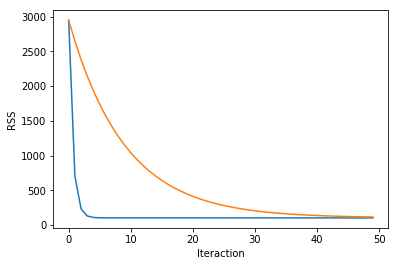

In [48]:
points = genfromtxt("income.csv", delimiter=",")
x = points[:,0] 
y = points[:,1]

starting_w0 = 0
starting_w1 = 0

learning_rate = 0.001
iterations_number = 50
[w0, w1, iter_number, rss_total] = gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)
show_figure(rss_total, "Iteraction", "RSS") 
print("RSS na última iteração: %.2f" % rss_total[-1])

learning_rate = 0.0001
[w0, w1, iter_number, rss_total] = gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)
show_figure(rss_total, "Iteraction", "RSS") 
print("RSS na última iteração: %.2f" % rss_total[-1])

Com esse gráfico é possível observar que:
#### Quanto maior o Learning Rate, maior o número de iterações necessárias para se atingir um mesmo erro.

In [51]:
learning_rate = 0.001
iterations_number = 1000
[w0, w1, iter_number, rss_total] = gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)
print("RSS na última iteração: %.2f" % rss_total[-1])

iterations_number = 10000
[w0, w1, iter_number, rss_total] = gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)
print("RSS na última iteração: %.2f" % rss_total[-1])

RSS na última iteração: 91.83
RSS na última iteração: 41.02


Ao observar os valores de RSS calculados quando o número de iterações aumenta, é possível observar que o RSS obtido diminui cada vez mais.

#### 4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

Foram testados diferentes valores para o número de iterações, e diferentes frações do Learning Rate até que com a seguinte configuração, obteve o valor desejado:

In [57]:
learning_rate = 0.0025
iterations_number = 20000
[w0, w1, iter_number, rss_total] = gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)

print("W0: %.2f" % w0)
print("W1: %.2f" % w1)
print("RSS na última iteração: %.2f" % rss_total[-1])

W0: -39.11
W1: 5.58
RSS na última iteração: 29.83


#### 5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado ao tamanho do gradiente (como no algoritmo dos slides apresentados em sala). 

A metodologia aplicada foi a seguinte: quando não se fornece o número de iterações por parâmetro, o algoritmo irá iterar até que a norma do gradiente descendente seja igual a 0,001. Ou:

$\vert\vert (W_{0}^{grad}, W_{1}^{grad} ) \vert\vert < 0,001 $

In [58]:
learning_rate = 0.0025
iterations_number = 0
[w0, w1, iter_number, rss_total] = gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)

print("W0: %.2f" % w0)
print("W1: %.2f" % w1)
print("RSS na última iteração: %.2f" % rss_total[-1])

W0: -39.44
W1: 5.60
RSS na última iteração: 29.83


#### 6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

O valor utilizado, conforme descrito na questão anterior, foi 0,001. Ou seja, quando o tamanho do gradiente for menor que 0,001, então, o algoritmo entenderá que a aproximação convergiu e terminará o processamento.

#### 7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

Foi implementada a função considerando a forma fechada. Dessa maneira, foi observado que o tempo de processamento descrito na questão 6 foi, aproximadamente, cinco vezes maior. Mesmo considerando o código implementado já na versão vetorizada.


In [70]:
import time

start_time = time.time()
[w0, w1, iter_number, rss_total] = gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)
gradient_time = float(time.time()-start_time)
print("Tempo para calcular os coeficientes pelo gradiente descendente: %.2f s." % gradient_time)

start_time = time.time()

## Compute the W0 and W1 by derivative
#  @param x Domain points
#  @param y Image points
def compute_normal_equation(x, y):
	x_mean = numpy.mean(x)
	y_mean = numpy.mean(y)
	w1 = sum((x - x_mean)*(y - y_mean))/sum((x - x_mean)**2)
	w0 = y_mean-(w1*x_mean)
	return [w0, w1]

derivative_time = float(time.time()-start_time)
print("Tempo para calcular os coeficientes de maneira fechada: %.4f s." % derivative_time)

ratio = float(gradient_time/derivative_time)
print("Ou seja, calcular os coeficientes por meio da forma fechada é %.0f vezes mais rápido que via gradiente." % (ratio))


Tempo para calcular os coeficientes pelo gradiente descendente: 1.90 s.
Tempo para calcular os coeficientes de maneira fechada: 0.0002 s.
Ou seja, calcular os coeficientes por meio da forma fechada é 8003 vezes mais rápido que via gradiente.


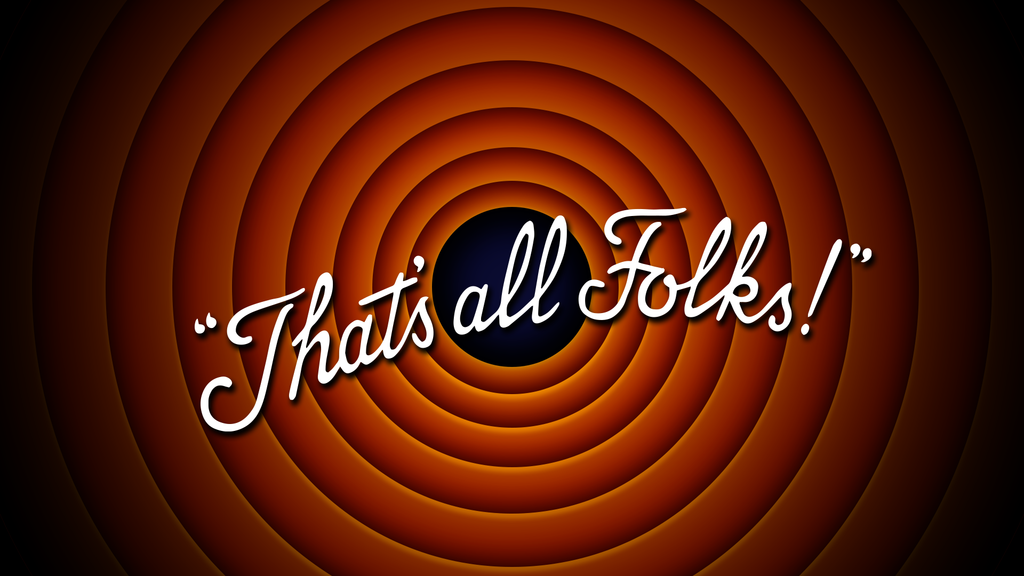